# PGA Tour Analysis of Performance Metrics

The [PGA Tour](https://www.pgatour.com/) is a series of professional golf tournaments held mostly in the United States. It is the premier pro tour in the world. The current 2017-18 season runs from October 2017 to September 2018 and features 48 events. The PGA Tour records every shot players take with its Shotlink technology, allowing them to calculate many statistics. The revolutionary 'strokes gained' metric calculates how many shots a player gains (or loses) on the field in an individual golf tournament. Strokes Gained Putting was introduced in 2011 along with Strokes Gained Tee To Green. In 2016 Strokes Gained Tee To Green was further split into three more categories: Off The Tee, Approach The Green, and Around The Green.  Strokes gained has replaced traditional statistics as the primary measure of shot performance on the PGA Tour. These statistics allow fans to enjoy the PGA Tour like never before. Here is a fantastic and succinct [explanation](https://www.pgatour.com/news/2016/05/31/strokes-gained-defined.html) of how the system works. Here is clarification on which metrics measure which shots:

SG Off The Tee - Tee shots on all par 4s and par 5s

SG Approach - Shots more than 30 yards from the edge of the green including tee shots on par 3s.

SG Around The Green - Shots within 30 yards from the edge of the green.

SG Putting - Shots on the green.

SG Tee To Green = SG Off The Tee + SG Approach + SG Around The Green

SG Total = SG Tee To Green + SG Putting

In this project, we will work with data from the 2016-17 PGA Tour season.

## Importing and Reading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The player_stats table was scraped from various [stats pages](https://www.pgatour.com/stats.html) on the pga tour website. The code for acquiring and cleaning this table is [here](https://github.com/pleicht17/PGA-Stats/blob/master/pga_scraping_stats.py).

In [2]:
player_stats = pd.read_csv('C:/Users/Patrick/DataFiles/pga stats.csv', encoding='latin-1')

## Introducting The Data

In [3]:
del player_stats['Unnamed: 0']
player_stats.head()

,Player,Events,Money,Wins,Scoring Average,Actual Scoring Average,Stroke Differential,SG Total,SG Tee To Green,SG Off The Tee,Driving Distance,Driving Accuracy,SG Approach,Proximity,Greens In Regulation,SG Around The Green,Scrambling,SG Putting,One Putt Percentage,Putts Per Round
0,Justin Thomas,25,9921560,5,69.359,69.39,1.78,1.618,1.330,0.398,309.7,55.05,0.680,35.166667,67.16,0.252,60.39,0.289,43.67,28.25
1,Jordan Spieth,23,9433033,3,68.846,68.94,2.11,1.871,1.552,0.276,295.6,60.00,0.906,33.750000,70.01,0.370,61.76,0.320,41.45,28.45
2,Dustin Johnson,20,8732193,4,69.549,69.61,1.64,1.905,1.809,1.002,315.0,56.97,0.702,33.416667,69.52,0.104,62.76,0.096,40.16,29.10
3,Hideki Matsuyama,22,8380570,3,69.624,69.66,1.66,0.987,1.369,0.455,303.3,58.61,0.645,34.833333,69.01,0.269,61.56,-0.383,40.57,28.86
4,Jon Rahm,23,6123248,1,69.561,69.64,1.61,1.814,1.540,0.935,305.8,58.66,0.535,35.250000,68.61,0.070,63.33,0.274,40.23,28.88


Before strokes gained was invented, traditional metrics that were used to describe player performance in four categories included:

Driving: Driving Distance, Driving Accuracy

Approach shots: Greens In Regulation, Proximity to the Hole

Shots around the green: Scrambling

Putting: One Putt Percentage, Putts Per Round

Scrambling is the percentage of time a player makes par or better if they missed a green in regulation.

There are problems with each of these metrics if you want to use them to measure only the type of shot its labeled:

Driving Distance - This is our closest thing to an exception. Driving distance is a good indicator of a player's ability at driving. In only doesn't take into account accuracy.

Driving Accuracy - Doesn't take into account driving distance and also counts shots settling in the first cut as a missed fairway.

Greens In Regulation & Proximity to the Hole - Both are affected by distance and accuracy of the drive, length of the hole, and size of the green.

Scrambling - The quality of the approach shot and putting ability both affect scrambling.

One Putt Percentage & Putts Per Round - Both are affected by the proximity of the previous shot to the hole.

Besides the problems mentioned, there are also problems with these metrics on a course-by-course basis. Various climate and ground conditions affect all four types of shots.

Strokes gained is a large improvement on the traditional metrics. It (1) calculates a score for each shot based on distance from the hole and lie conditions for each the start and end point of each shot and then, very importantly, (2) adjusts the score based on performance of the tournament field. Course conditions like width of fairways, length of rough, size of greens affect these traditional metrics without correcting them for field conditions. Strokes gained successfully allows measurement of types of shots without dependence on other types of shots and without bias to individual tournament conditions. It is the only metric that effectively measures "How good is this shot" and "How good were these kinds of shots to the rest of the field".

## Correlations

Some of these features are better the smaller the value is, so to reflect that I will change those values temporarily.

In [4]:
player_stats_corr = player_stats
#Smaller values are better in the case of Scoring Average, Actual Scoring Average, Proximity, and Putts Per Round
#This line reverses the order so that it will be easier to read correlations and the heatmap
player_stats_corr[['Scoring Average', 'Actual Scoring Average', 'Proximity', 'Putts Per Round']] = player_stats_corr[['Scoring Average', 'Actual Scoring Average', 'Proximity', 'Putts Per Round']].applymap(lambda x: x * -1)
player_stats_corr = player_stats_corr.corr()
player_stats_corr

,Events,Money,Wins,Scoring Average,Actual Scoring Average,Stroke Differential,SG Total,SG Tee To Green,SG Off The Tee,Driving Distance,Driving Accuracy,SG Approach,Proximity,Greens In Regulation,SG Around The Green,Scrambling,SG Putting,One Putt Percentage,Putts Per Round
Events,1.000000,-0.001674,0.020628,-0.108046,-0.003041,-0.157235,-0.128007,-0.088968,-0.079173,-0.033086,0.027861,-0.035491,-0.035077,0.049895,-0.063360,-0.089334,-0.093871,-0.130290,-0.107504
Money,-0.001674,1.000000,0.803511,0.731933,0.630883,0.731764,0.718750,0.656224,0.455307,0.409675,-0.034561,0.507859,0.104886,0.341928,0.290381,0.292985,0.193126,0.213407,0.222509
Wins,0.020628,0.803511,1.000000,0.394902,0.358687,0.394481,0.389550,0.357518,0.250739,0.284302,-0.077612,0.269520,0.089727,0.191338,0.165253,0.100185,0.100802,0.184791,0.156956
Scoring Average,-0.108046,0.731933,0.394902,1.000000,0.924077,0.987305,0.964450,0.880513,0.611866,0.402713,0.140017,0.713334,0.242890,0.593251,0.332558,0.523330,0.259136,0.147491,0.202915
Actual Scoring Average,-0.003041,0.630883,0.358687,0.924077,1.000000,0.905638,0.872423,0.806173,0.574382,0.333232,0.176255,0.640497,0.362889,0.694768,0.298587,0.590131,0.213765,0.125250,0.174050
Stroke Differential,-0.157235,0.731764,0.394481,0.987305,0.905638,1.000000,0.973125,0.888605,0.623251,0.399357,0.147794,0.712238,0.229722,0.586920,0.337602,0.527967,0.261082,0.166212,0.215353
SG Total,-0.128007,0.718750,0.389550,0.964450,0.872423,0.973125,1.000000,0.894883,0.632378,0.411033,0.131678,0.716359,0.216697,0.536521,0.332283,0.517022,0.307258,0.175497,0.227168
SG Tee To Green,-0.088968,0.656224,0.357518,0.880513,0.806173,0.888605,0.894883,1.000000,0.754514,0.483704,0.161445,0.811934,0.326433,0.674387,0.257336,0.376926,-0.149750,-0.123572,-0.086986
SG Off The Tee,-0.079173,0.455307,0.250739,0.611866,0.574382,0.623251,0.632378,0.754514,1.000000,0.632699,0.226966,0.354614,0.188705,0.642998,-0.205201,0.083741,-0.207940,-0.264003,-0.298661
Driving Distance,-0.033086,0.409675,0.284302,0.402713,0.333232,0.399357,0.411033,0.483704,0.632699,1.000000,-0.534419,0.239165,-0.142761,0.327736,-0.135744,-0.168032,-0.120840,-0.114395,-0.154197


Here is a heatmap of these correlations for to make the information easier to visualize.

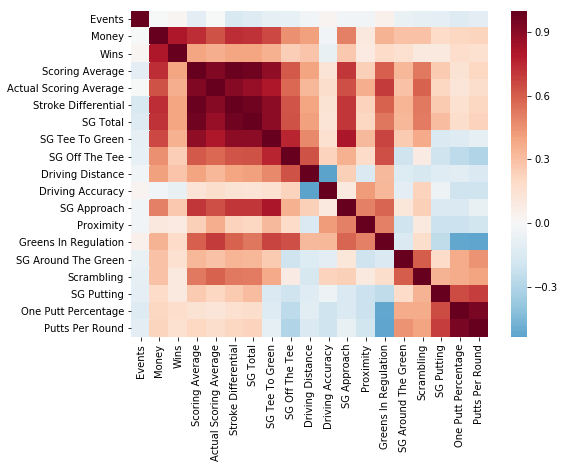

In [5]:
plt.figure(figsize=(8, 6))
#sns.heatmap(player_stats_corr.applymap(lambda x: abs(x)), cmap='RdBu_r')
sns.heatmap(player_stats_corr, cmap='RdBu_r', center=0)

First off, we must answer the question what is the best overall performance metric. One option is wins, but the problem is that only a small percentage of players have a win so we wouldn't be able to make an end-to-end player analysis based on this feature. The second option is FedEx Cup points (not listed in our dataframes). The FedEx Cup is the PGA Tours season-long race to declare a champion. Players earn a certain number of FedEx Cup Points by how they finish in tournaments. This would work well except that there are 4 playoff events that the FedEx Cup is more heavily factored by, and only players that have enough points qualify for the next playoff event. Another option is world ranking points earned which would be great, but the time it would take to obtain this data from the Offical World Golf Ranking website and merge with our PGA Tour data would be impractical. A better option is money earned, which is distributed similarly as FedEx Cup points, but are not factored differently during the playoffs. Tournaments vary in the size of their purses and money is heavily influenced by wins, top 10's, and events played. Still, money is a good option. Another performance metrics is scoring average which is averaged over the season in this case. Similar to scoring average, stroke differential measures how many strokes a player was better than the field for that week, averaged over the entire season. We will use stroke differential as our primary metric over scoring average because its distribution is centered around zero and factors in how a player did relative to tournament conditions, unlike scoring average. Our second best metric is money earned.

There are a lot of interesting insights just by taking an initial look at the heatmap.

1. All the metrics that measure overall performance (Money, Wins, Scoring Average, Actual Scoring Average, and Stroke Differential) are highly correlated except for wins, which has its problems in this analysis already, and to a lesser degree money, because it has other factors involved besides scoring.

2. Scoring Average and Actual Scoring Average are very similar. But par can vary by course and Scoring Average smoothes out the difference. Scoring Average by the numbers also appears to a better measure than Actual Scoring Average since it has a stronger correlation than its counterpart in almost every important statistic.

3. The order of importance obvserved by the correlations for the individual strokes gained categories in comparison with money, scoring average, and stroke differential is:
    1. SG Approach
    2. SG Off The Tee
    3. SG Around The Green
    4. SG Putting

Comparing stats in similar categories:

1. SG Off The Tee is more important than driving distance which is more important than driving accuracy. Driving distance and driving accuracy are inversely related.

2. SG Approach is more important than greens in regulation, which is more important than proximity.

3. Scrambling outperforms SG Around The Green.

4. SG Putting is only slightly more important than one putt percentage and putts per round.

For traditional stats depending on stats from other categories we found:

1. Green in regulation (and to a lesser degree, proximity) is related to SG Off The Tee.

2. Scrambling is related to SG Putting.

3. One putt percentage and putts per round are both correlated with positive performance in SG Around the Green and negatively correlated with every approach statistic.

### Comparing Stroke Differerential and Money

Both are good overall measures of player performance. Here is how they compare against all strokes gained statistics.

In [6]:
#Reversing previous command
player_stats_corr[['Scoring Average', 'Actual Scoring Average', 'Proximity', 'Putts Per Round']] = player_stats_corr[['Scoring Average', 'Actual Scoring Average', 'Proximity', 'Putts Per Round']].applymap(lambda x: x * -1)

player_stats_corr.loc[['SG Total', 'SG Tee To Green', 'SG Off The Tee', 'SG Approach', 'SG Around The Green', 'SG Putting'], ['Stroke Differential', 'Money']]

,Stroke Differential,Money
SG Total,0.973125,0.718750
SG Tee To Green,0.888605,0.656224
SG Off The Tee,0.623251,0.455307
SG Approach,0.712238,0.507859
SG Around The Green,0.337602,0.290381
SG Putting,0.261082,0.193126


In all cases, strokes gained was had a higher correlation with stroke differential than money.

## Examining Stroke Differential

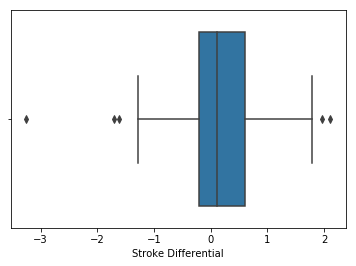

In [7]:
sns.boxplot(player_stats['Stroke Differential'])

Our big outlier is Steven Bowditch who had a year beyond awful. However, he's a joy to follow on [twitter](http://golfweek.com/2016/09/10/steven-bowditch-take-down-twitter-troll-criticism/). He plays a lot of tournaments because of his past champion status.

On the other end of the spectrum, it is now even more clear how great of a season Jordan Spieth actually had. He is the only player to average a score under 69 and the only one with a +2 stroke differential. He is the big outlier on the side of the distribution where, well... lets just say it's hard to be that good at golf. Nobody should be that much better than the best players in the world.

Rickie Fowler is the other outlier on the right side just behind Jordan. He had a great season which went under the radar due to his lack of wins, which is a problem for Rickie every year. The tours most popular player has the potential to be one of the best of his generation if he can get in the winner's circle as much as his stats should indicate.

Back to Steven Bowditch, he did so bad that he's going to have way too large of an impact on our visualizations. We'll take a look at his stats and drop him from the main stats table for now.

In [8]:
Steven_Bowditch = player_stats[player_stats['Player'] == 'Steven Bowditch']
player_stats = player_stats[player_stats['Player'] != 'Steven Bowditch']
Steven_Bowditch

,Player,Events,Money,Wins,Scoring Average,Actual Scoring Average,Stroke Differential,SG Total,SG Tee To Green,SG Off The Tee,Driving Distance,Driving Accuracy,SG Approach,Proximity,Greens In Regulation,SG Around The Green,Scrambling,SG Putting,One Putt Percentage,Putts Per Round
189,Steven Bowditch,27,24650,0,-74.4,-74.22,-3.26,-2.889,-2.739,-1.717,287.3,45.37,-1.26,-40.333333,53.54,0.238,51.96,-0.15,38.69,-29.2


In [9]:
#Combining SG Off The Tee and SG Approach and comparing with SG Total
-1.717 - 1.260

-2.9770000000000003

Bowditch lost more strokes off the tee and on the approach than he did in total. His short game was above average and his putting was average. For Bowditch, all the damage was done more than 30 yards from the green. Now we'll take a look at the four individual strokes gained categories side by side against stroke differential.

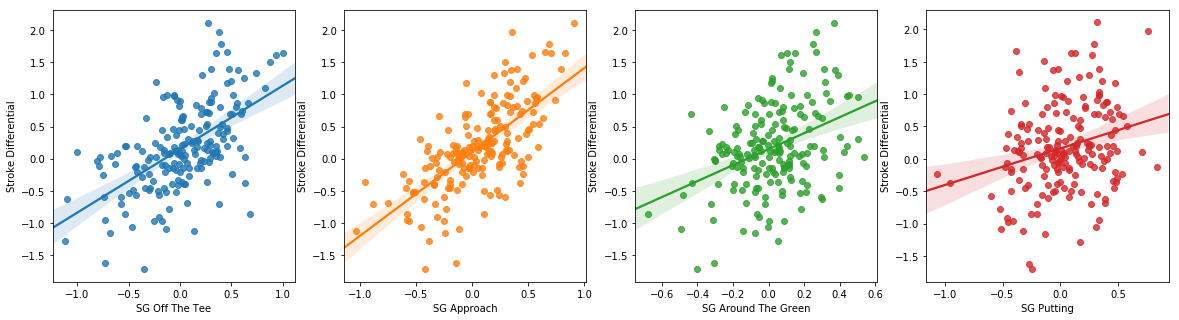

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 5))

sns.regplot(x='SG Off The Tee', y='Stroke Differential', data=player_stats, ax=ax[0])
sns.regplot(x='SG Approach', y='Stroke Differential', data=player_stats, ax=ax[1])
sns.regplot(x='SG Around The Green', y='Stroke Differential', data=player_stats, ax=ax[2])
sns.regplot(x='SG Putting', y='Stroke Differential', data=player_stats, ax=ax[3])

We can see subtle changes in variation in order of SG Approach, SG Off The Tee, SG Around The Green, and SG Putting, which validates our takeaway from looking at the correlation values. The data in SG Approach is also more tightly compact around the regression line than the other three, even SG Off The Tee, indicating that it is the key aspect of a golf game that makes tour players successful. SG Around The Green has a smaller range than the other strokes gained categories.

## Off The Tee

Now we will compare tee shot metrics. We already established that driving distance is more important than driving accuracy.

In [11]:
player_stats[['SG Off The Tee', 'Driving Distance', 'Driving Accuracy']].describe()

,SG Off The Tee,Driving Distance,Driving Accuracy
count,189.000000,189.000000,189.000000
mean,0.032439,292.811111,60.685132
std,0.395964,9.449363,5.174625
min,-1.123000,271.400000,45.930000
25%,-0.179000,286.500000,57.030000
50%,0.031000,292.600000,60.180000
75%,0.303000,298.900000,64.200000
max,1.002000,317.200000,72.730000


(-1.8, 2.3)

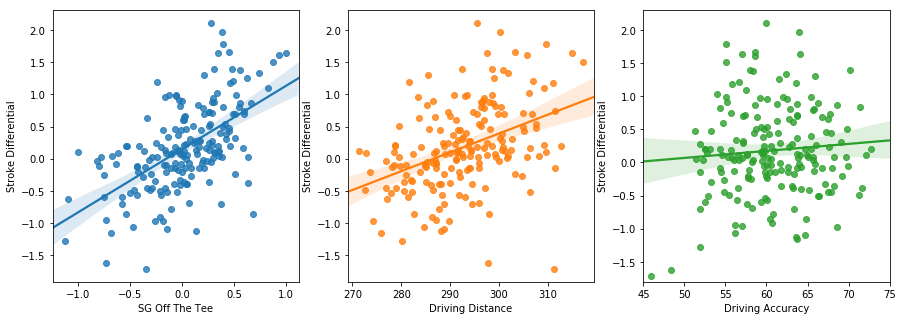

In [12]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

sns.regplot(x='SG Off The Tee', y='Stroke Differential', data=player_stats, ax=ax[0])
sns.regplot(x='Driving Distance', y='Stroke Differential', data=player_stats, ax=ax[1])
#matplotlib and seaborn work poorly together here and the limits must be set manually on only the last subplot.
sns.regplot(x='Driving Accuracy', y='Stroke Differential', data=player_stats, ax=ax[2])
ax[2].set_xlim(45, 75)
ax[2].set_ylim(-1.8, 2.3)

The first graph is only a benchmark for the other two. The data suggests that hitting the ball x yards further is more important than hitting y% more fairways. Comparing the 25% and the 75%, this means that it is preferred to add an extra 12 yards to your drive (and about one less club on your approach) than a 7% extra chance of hitting the fairway (or hitting 1 extra fairway per day). This is believable.

The graph below shows that driving distance and driving accuracy are negatively correlated to one another, which is not a surprise, but given a choice between the two it's clear that driving distance takes the cake.

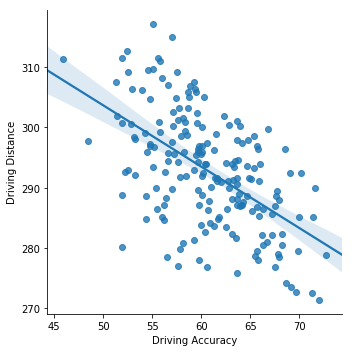

In [13]:
sns.lmplot(x='Driving Accuracy', y='Driving Distance', data=player_stats)

## Approach

Now we will compare metrics of the approach shot, our seemingly highest indicator of pga tour success.

In [14]:
player_stats[['SG Approach', 'Proximity', 'Greens In Regulation']].describe()

,SG Approach,Proximity,Greens In Regulation
count,189.000000,189.000000,189.000000
mean,0.057254,-36.121252,65.452222
std,0.354585,1.390120,2.490268
min,-1.035000,-39.833333,56.840000
25%,-0.168000,-37.000000,63.610000
50%,0.089000,-36.000000,65.670000
75%,0.306000,-35.166667,67.110000
max,0.906000,-32.666667,70.640000


(-1.8, 2.3)

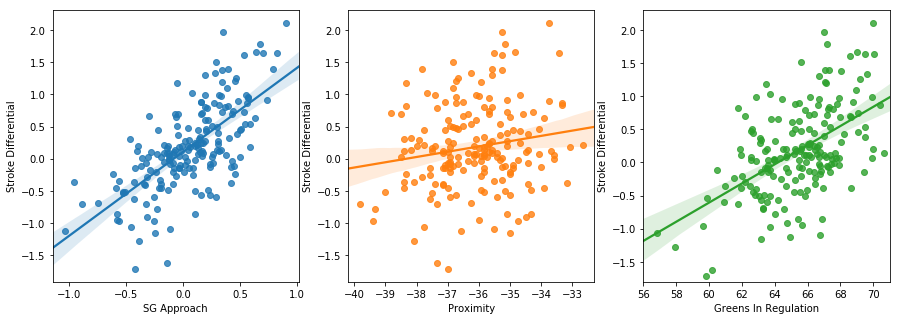

In [15]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

sns.regplot(x='SG Approach', y='Stroke Differential', data=player_stats, ax=ax[0])
sns.regplot(x='Proximity', y='Stroke Differential', data=player_stats, ax=ax[1])
sns.regplot(x='Greens In Regulation', y='Stroke Differential', data=player_stats, ax=ax[2])
ax[2].set_xlim(56, 71)
ax[2].set_ylim(-1.8, 2.3)

Greens in regulation is clearly a better metric than Proximity.

## Around The Green

Measuring performance around the green can be a tricky. Golfs best traditional stat for it is scrambling. There are a few problems with scrambling for measuring purely shots from off the green. First, It only includes scrambling for par, so a player who is off the green for his par attempt can only successfully scramble if he holes out. Second, scrambling treats easy shots like chipping off the edge of the green and difficult shots like a bunker shot as the same. Third, scrambling requires a successful one putt, which invades short game analysis with another part of the game, putting. Despite all that, scrambling correlates with stroke differential more strongly than SG Around The Green, but the two metrics are not the best to compare with each other. Scrambling is also higher because a successful scramble means that a player walks away from the hole with a par when he does not have a birdie putt and saving par is an essential part of success on the PGA Tour.

In [16]:
player_stats[['SG Around The Green', 'Scrambling']].describe()

,SG Around The Green,Scrambling
count,189.000000,189.000000
mean,0.025915,58.775926
std,0.210682,3.164629
min,-0.678000,48.010000
25%,-0.091000,56.680000
50%,0.028000,58.830000
75%,0.144000,60.600000
max,0.538000,67.360000


(-1.8, 2.3)

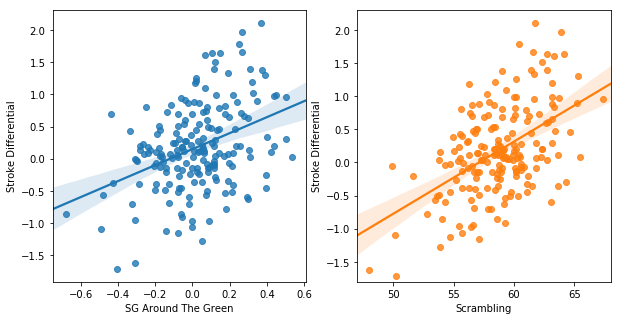

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

sns.regplot(x='SG Around The Green', y='Stroke Differential', data=player_stats, ax=ax[0])
sns.regplot(x='Scrambling', y='Stroke Differential', data=player_stats, ax=ax[1])
ax[1].set_xlim(47, 68)
ax[1].set_ylim(-1.8, 2.3)

## Putting

Just like scrambling, the traditional metrics for putting rely on other parts of a golfer's repertoire such including short game and approach.

In [18]:
player_stats[['SG Putting', 'One Putt Percentage', 'Putts Per Round']].describe()

,SG Putting,One Putt Percentage,Putts Per Round
count,189.000000,189.000000,189.000000
mean,0.036280,39.176984,-29.068201
std,0.312293,2.096160,0.462896
min,-1.066000,32.950000,-30.420000
25%,-0.155000,37.880000,-29.380000
50%,0.030000,39.120000,-29.080000
75%,0.276000,40.530000,-28.720000
max,0.840000,43.810000,-28.130000


(-1.8, 2.3)

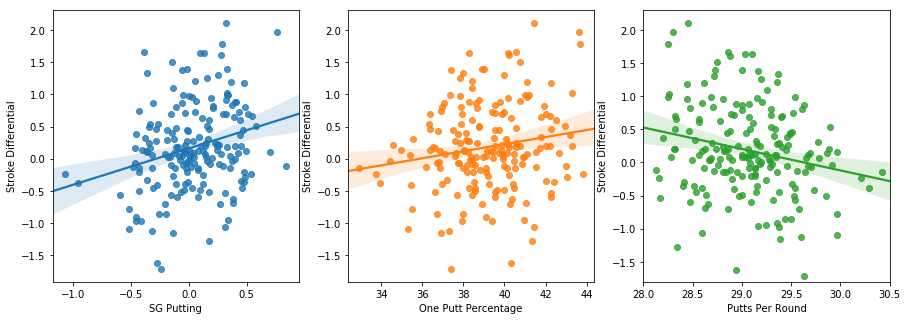

In [19]:
player_stats[['Scoring Average', 'Actual Scoring Average', 'Proximity', 'Putts Per Round']] = player_stats[['Scoring Average', 'Actual Scoring Average', 'Proximity', 'Putts Per Round']].applymap(lambda x: x * -1)
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

sns.regplot(x='SG Putting', y='Stroke Differential', data=player_stats, ax=ax[0])
sns.regplot(x='One Putt Percentage', y='Stroke Differential', data=player_stats, ax=ax[1])
sns.regplot(x='Putts Per Round', y='Stroke Differential', data=player_stats, ax=ax[2])
ax[2].set_xlim(28, 30.5)
ax[2].set_ylim(-1.8, 2.3)

There is nothing special going on in any of these graphs. None them have Pearson r absolute value greater than 0.27. None of them are good indicators of how successful a player is. Informally however, it might be said that all things being equal, the player in contention that makes more putts is more likely to win the golf tournament. But I do not have the data, nor can I acquire the data, to back that claim up.

Earlier I said one putt percentage and putts per round are both correlated with positive performance in SG Around The Green. I want to follow up on that.

In [20]:
player_stats[['SG Around The Green', 'One Putt Percentage', 'Putts Per Round']].describe()

,SG Around The Green,One Putt Percentage,Putts Per Round
count,189.000000,189.000000,189.000000
mean,0.025915,39.176984,29.068201
std,0.210682,2.096160,0.462896
min,-0.678000,32.950000,28.130000
25%,-0.091000,37.880000,28.720000
50%,0.028000,39.120000,29.080000
75%,0.144000,40.530000,29.380000
max,0.538000,43.810000,30.420000


(-0.75, 0.6)

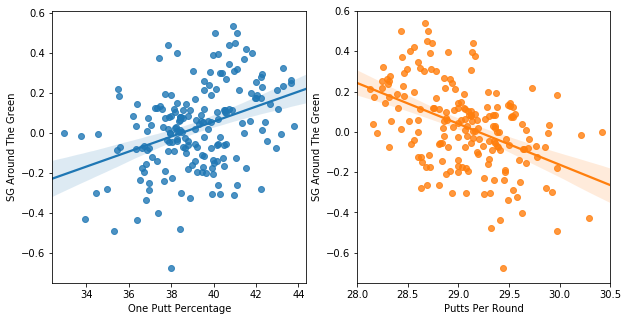

In [21]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

sns.regplot(x='One Putt Percentage', y='SG Around The Green', data=player_stats, ax=ax[0])
sns.regplot(x='Putts Per Round', y='SG Around The Green', data=player_stats, ax=ax[1])
ax[1].set_xlim(28, 30.5)
ax[1].set_ylim(-0.75, 0.6)

SG Around The Green is calculated only on shots off the green and how close they end up to the hole. The putting metrics are only calculated with number of shots on the green. These graphs show that short game performance off the green invades metrics that are supposed to measure putting. So we can't use one putt percentage or putts per round as pure putting metrics.

If we compare SG Around The Green and SG Putting they should not be related (except that maybe in general players with good short games are also decent putters).

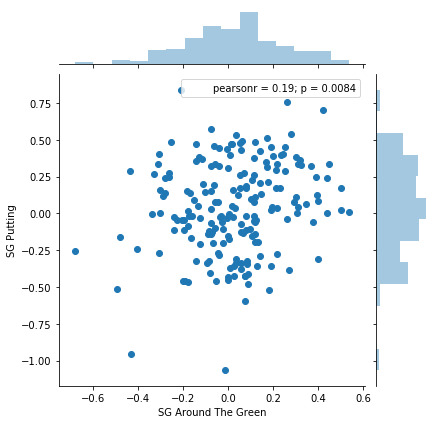

In [22]:
sns.jointplot(x='SG Around The Green', y='SG Putting', data=player_stats)

And that's exactly what we get. The do have a pearson r of 0.19, but this is only because in general players with good short games are also good putters. To compare, SG Around The Green has pearson r values of 0.37 and -0.44 for one putt percentage and putts per round respectively.

## Combining SG Off The Tee and SG Approach

Our two most important strokes gained categories, as established earlier, are approach and off the tee. There were strong correlations with both of these metrics and overall performance metrics. Let's take a look at how the first two shots determine success.

In [23]:
player_stats['SG Long Game'] = player_stats['SG Off The Tee'] + player_stats['SG Approach']
player_stats.corr().loc[['Money', 'Wins', 'Scoring Average', 'Stroke Differential'], ['SG Long Game', 'SG Off The Tee', 'SG Approach']]

,SG Long Game,SG Off The Tee,SG Approach
Money,0.596347,0.456628,0.508212
Wins,0.325904,0.254734,0.271947
Scoring Average,-0.773703,-0.566813,-0.687962
Stroke Differential,0.780888,0.578963,0.686662


Combining them indeed goes further in predicting success. Combining them is a simplified way of showing that the long game is important.

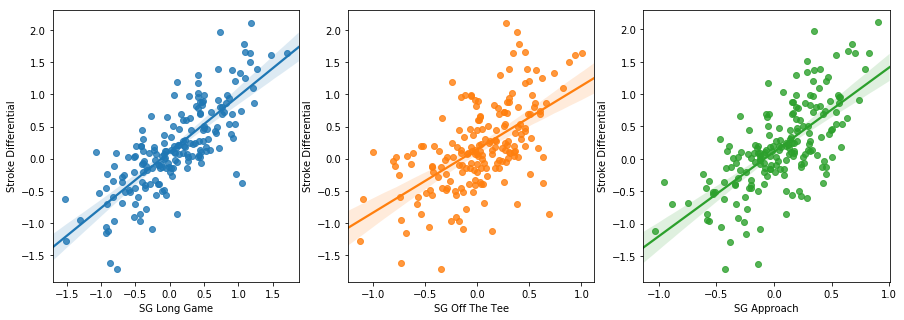

In [24]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

sns.regplot(x='SG Long Game', y='Stroke Differential', data=player_stats, ax=ax[0])
sns.regplot(x='SG Off The Tee', y='Stroke Differential', data=player_stats, ax=ax[1])
sns.regplot(x='SG Approach', y='Stroke Differential', data=player_stats, ax=ax[2])

## Combining SG Around The Green and SG Putting

Since we've combine the first two SG categories, I'm interested in seeing the what combining these two categories will do.

In [25]:
player_stats['SG Short Game'] = player_stats['SG Around The Green'] + player_stats['SG Putting']
player_stats.corr().loc[['Money', 'Wins', 'Scoring Average', 'Stroke Differential'], ['SG Short Game', 'SG Around The Green', 'SG Putting']]

,SG Short Game,SG Around The Green,SG Putting
Money,0.298831,0.297091,0.190714
Wins,0.162672,0.167747,0.099756
Scoring Average,-0.395642,-0.381774,-0.260300
Stroke Differential,0.400823,0.388326,0.262662


In all four cases, our new SG category is a far closer comparison to SG Around The Green. This was unexpected.

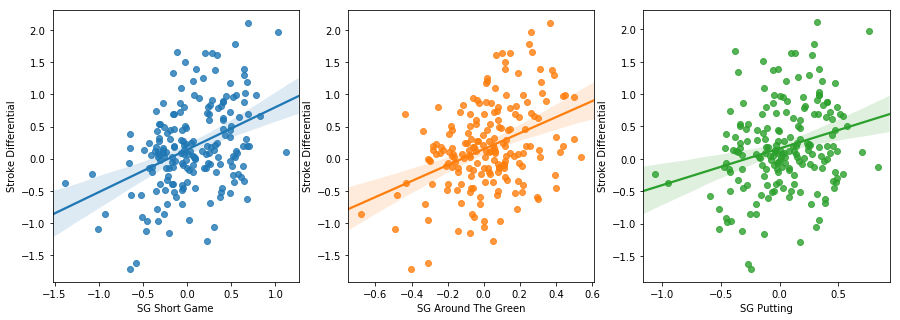

In [26]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

sns.regplot(x='SG Short Game', y='Stroke Differential', data=player_stats, ax=ax[0])
sns.regplot(x='SG Around The Green', y='Stroke Differential', data=player_stats, ax=ax[1])
sns.regplot(x='SG Putting', y='Stroke Differential', data=player_stats, ax=ax[2])

Here is a side by side our new SG categories, long game and short game.

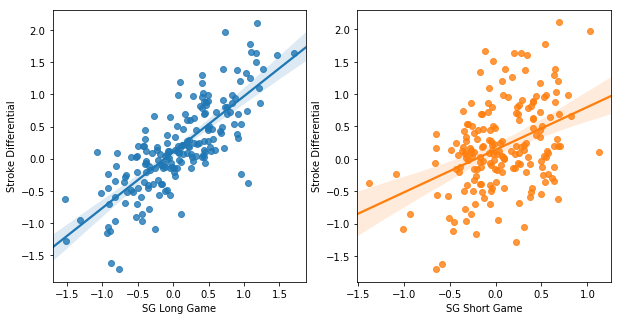

In [27]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

sns.regplot(x='SG Long Game', y='Stroke Differential', data=player_stats, ax=ax[0])
sns.regplot(x='SG Short Game', y='Stroke Differential', data=player_stats, ax=ax[1])

## Success Factors For Individual Players

We can create a heatmap in order to see how the top players achieve success on the PGA Tour. Each column will be scaled from -1 to 1 in order to see relative success between each factor, rather than scaling all of the columns together. A dark red color indicates that they are one of the best of that category while a dark blue color indicates that they are among the worst. It will be ordered by stroke differential. Because we are scaling each column I want to first show the range of the 4 individual SG categories first.

In [28]:
def getColumnRange(col):
    mx = col.max()
    mn = col.min()
    
    range_ = mx - mn
    return range_

stats_range = pd.DataFrame([getColumnRange(player_stats['SG Off The Tee']),
                        getColumnRange(player_stats['SG Approach']),
                        getColumnRange(player_stats['SG Around The Green']),
                        getColumnRange(player_stats['SG Putting'])],
                        columns=['Range'],
                        index=['SG Off The Tee', 'SG Approach', 'SG Around The Green', 'SG Putting'],)
stats_range

,Range
SG Off The Tee,2.125
SG Approach,1.941
SG Around The Green,1.216
SG Putting,1.906


Only SG Around The Green has a much smaller range than the other three. This means proficiency in SG Around The Green has a limit into how much it can affect overall performance. Now to plot the heatmap.

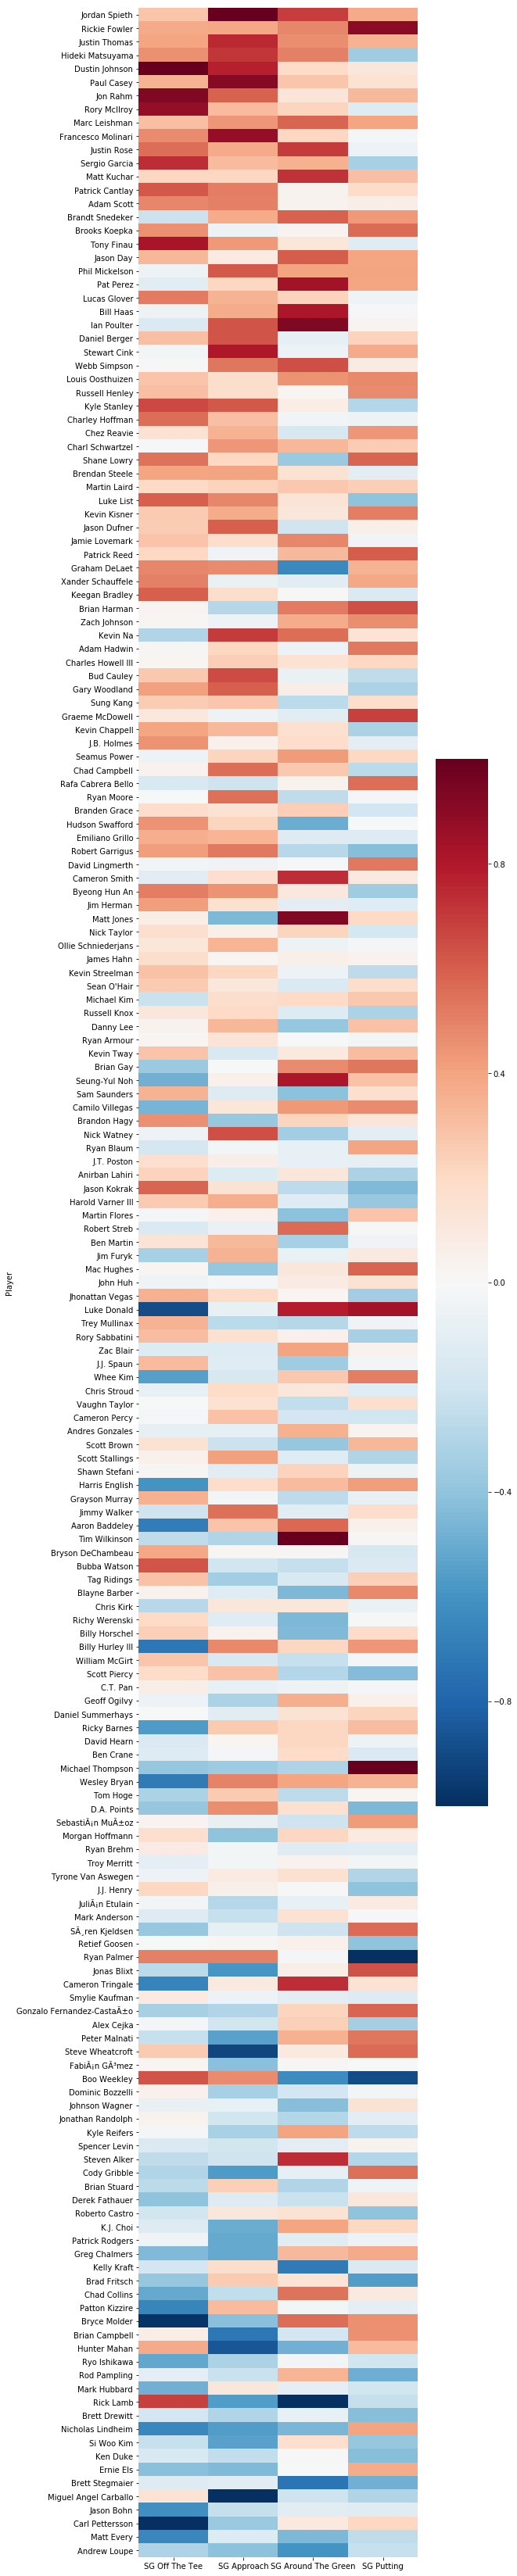

In [29]:
player_stats = player_stats.sort_values('Stroke Differential', ascending=False)
player_stats.index = player_stats['Player']

def scaleColumn(col):
    mx = col.max()
    mn = col.min()
    
    def scaleValue(x):
        if x > 0:
            return x / mx
        else:
            return -x / mn
    
    return col.apply(lambda x: scaleValue(x))

player_heat_Tee = scaleColumn(player_stats['SG Off The Tee'])
player_heat_Approach = scaleColumn(player_stats['SG Approach'])
player_heat_Around = scaleColumn(player_stats['SG Around The Green'])
player_heat_Putting = scaleColumn(player_stats['SG Putting'])

player_heat = pd.DataFrame({'SG Off The Tee': player_heat_Tee,
                            'SG Approach': player_heat_Approach,
                            'SG Around The Green': player_heat_Around,
                            'SG Putting': player_heat_Putting},
                            index=player_stats['Player'])
player_heat = player_heat[['SG Off The Tee', 'SG Approach', 'SG Around The Green', 'SG Putting']]
plt.figure(figsize=(8, 6*(200 / 20)))
sns.heatmap(player_heat, cmap='RdBu_r', vmin=-1, vmax=1)

Of the top 30 players in stroke differential, only one has a negative SG Approach (Brooks Koepka #17) and it is barely negative. This is compared to 6 in SG Off The Tee, 2 in SG Around The Green, and 8 in SG Putting. Additionally the top 24 players are generally really good at the first three categories. Jordan Spieth, at number 1 in stroke differential, is anchored by his tour-leading SG Approach number. At the top, SG Putting is varied, and that extends to the rest of the table. SG Around The Green, like SG Putting, is also varied, but it is high at the top. It is uncommon for a great player to have poor or even average values for both SG Off The Tee and SG Approach. You have to go all the way down to Brian Harman and Zach Johnson at 45 and 46 in stroke differential to encounter this.

A more simplified approach to this heatmap is using our combined metrics: Long Game and Short Game.

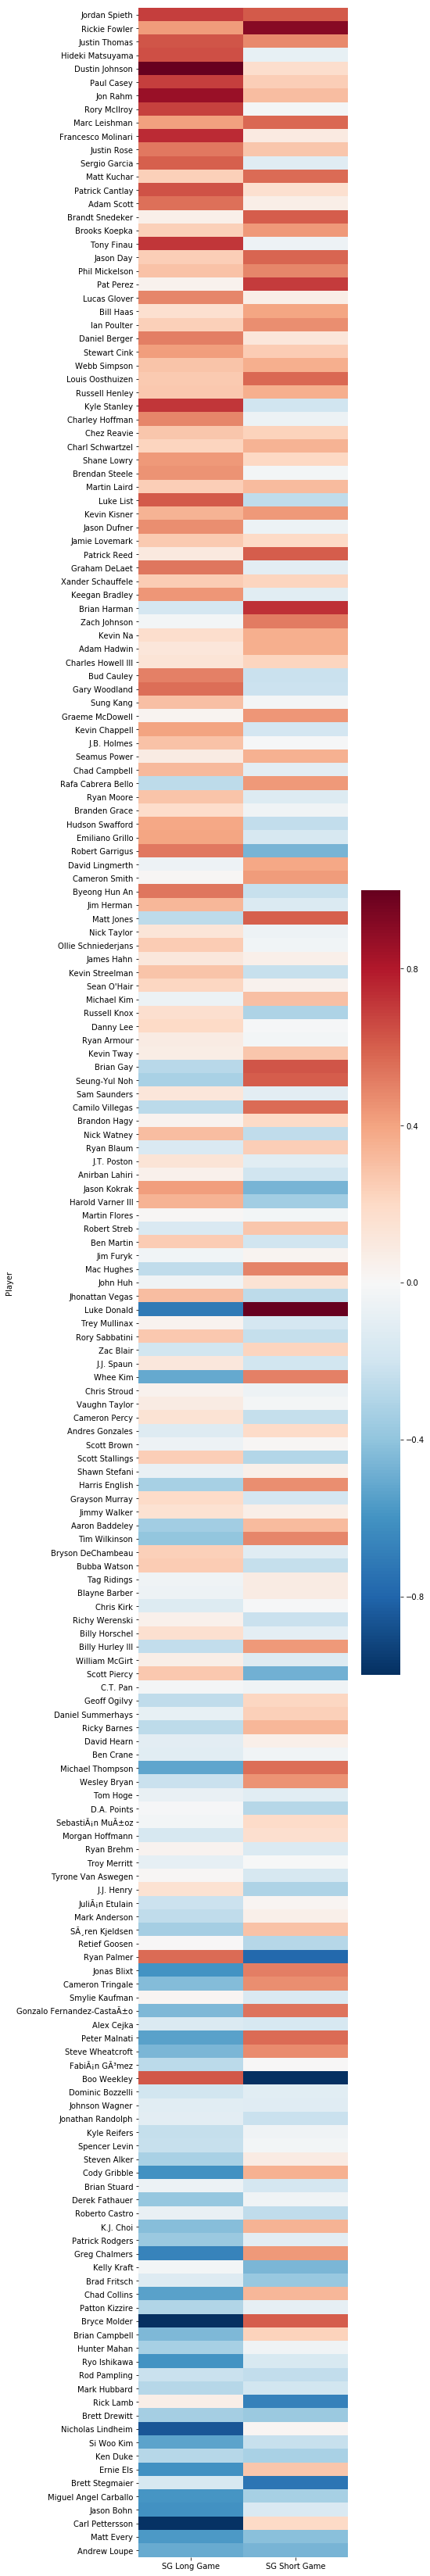

In [30]:
player_heat_Long = scaleColumn(player_stats['SG Long Game'])
player_heat_Short = scaleColumn(player_stats['SG Short Game'])

player_heat = pd.DataFrame({'SG Long Game': player_heat_Long,
                            'SG Short Game': player_heat_Short},
                            index=player_stats['Player'])
player_heat = player_heat[['SG Long Game', 'SG Short Game']]
plt.figure(figsize=(6,6*(200 / 20)))
sns.heatmap(player_heat, cmap='RdBu_r', vmin=-1, vmax=1)

## Conclusion

Traditional metrics do a poor job of measuring ability in the four categories above because of reliance on shots from different categories and various conditions of shots and tournament fields. However, some of these metrics still measure overall player performance well. Strokes Gained fixes these problems encountered by traditional metrics and produces a reliable way of measuring player ability in each of these categories. These new statistics have revolutionized the way fans enjoy the PGA Tour.

Success on the PGA Tour is generally determined by proficiency in the following categories in this order:

1. Strokes Gained: Approach the Green
2. Strokes Gained: Off the Tee
3. Strokes Gained: Around the Green
4. Strokes Gained: Putting

The first two are especially important. The elite players on tour are good at the first three.

## Looking Ahead

The PGA Tour has retroactively calculated strokes gained data all the way back to 2004, so this analysis can be largely expanded. Tiger Woods very best years, particularly 1999 and 2000, were before 2004. However he was very much still in his prime for many years that these stats were tracked. After a brief look at a few years for SG Approach I already found two (2006 and 2013) where Tiger's SG Approach number was staggeringly higher than anyone else's. Because of the draw to evaluate Tiger's game instills in me, an expanded analysis might be on the way.